In [ ]:
#plot_elbow-Euclidean
import numpy
from pandas import read_csv
from pandas import *
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
filename='daily_SO2_2019.csv'
names=['Latitude','Longitude','Date Local','Arithmetic Mean']
dataset=read_csv(filename,names=names)
dataset101=dataset.drop_duplicates(subset=['Latitude'])
dataset1=dataset.pivot_table(index = 'Date Local',columns = 'Latitude',values = 'Arithmetic Mean')#transform long data format into wide format
dataset11=dataset1.dropna(axis=1, how='any')#delete sites which includes NaN data
dataset111=dataset11.values.T
#X_train prepared

formatted_dataset = to_time_series_dataset(dataset111)#formatted

X_train = formatted_dataset
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)#normalized


def plot_elbow(data,seed):
    """
    :param df:multi time series  type is np.array
    :return: elbow plot
    """
    distortions = []
    for i in range(2, 8):
        TSKM = TimeSeriesKMeans(n_clusters=i, n_init=5, verbose=True, random_state=seed)
        TSKM.fit(data)
        distortions.append(TSKM.inertia_)
    plt.plot(range(2, 8), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion Line')
    plt.show()
    


def plot_elbow_2(data,seed):
    """
    :param df:multi time series  type is np.array
    :return: elbow plot
    """
    distortions = []
    for i in range(2, 8):
        sdtw_km = TimeSeriesKMeans(i,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)
        sdtw_km.fit(data)
        distortions.append(sdtw_km.inertia_)
    plt.plot(range(2, 8), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion Line')
    plt.show()


plot_elbow(X_train,0)
plot_elbow(X_train,1)
plot_elbow(X_train,2)
plot_elbow_1(X_train,0)
plot_elbow_1(X_train,1)
plot_elbow_1(X_train,2)


D:\some program\python\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


12139.572 --> 6777.496 --> 6753.506 --> 6745.670 --> 6734.710 --> 6728.681 --> 6723.144 --> 6720.437 --> 6719.424 --> 6717.105 --> 6714.130 --> 6712.453 --> 6711.609 --> 

KeyboardInterrupt: 

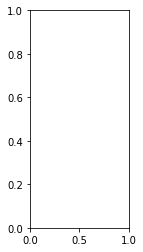

In [2]:
#plot_elbow-sdtw
import numpy
from pandas import read_csv
from pandas import *
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
filename='daily_NO2_2019.csv'
names=['Latitude','Longitude','Date Local','Arithmetic Mean']
dataset=read_csv(filename,names=names)
dataset101=dataset.drop_duplicates(subset=['Latitude'])
dataset1=dataset.pivot_table(index = 'Date Local',columns = 'Latitude',values = 'Arithmetic Mean')#transform long data format into wide format
dataset11=dataset1.dropna(axis=1, how='any')#delete sites which includes NaN data
dataset111=dataset11.values.T
#X_train prepared

formatted_dataset = to_time_series_dataset(dataset111)#formatted

X_train = formatted_dataset
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)#normalized

def plot_elbow_2(data,seed):
    """
    :param df:multi time series  type is np.array
    :return: elbow plot
    """
    distortions = []
    for i in range(2, 8):
        sdtw_km = TimeSeriesKMeans(i,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)
        sdtw_km.fit(data)
        distortions.append(sdtw_km.inertia_)
    plt.plot(range(2, 8), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion Line')
    plt.show()

plt.subplot(1,3,1)
plot_elbow_2(X_train,0)
plt.subplot(1,3,2)
plot_elbow_2(X_train,1)
plt.subplot(1,3,3)
plot_elbow_2(X_train,2)
plt.title('2019,NO2,sdtw,distortion line')

In [ ]:
#silhouette score-Euclidean
import numpy
from pandas import read_csv
from pandas import *
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score
def silhouette(air,seed):
    filename='daily_%s_2019.csv' % (air)
    names=['Latitude','Longitude','Date Local','Arithmetic Mean']
    dataset=read_csv(filename,names=names)
    dataset101=dataset.drop_duplicates(subset=['Latitude'])
    dataset1=dataset.pivot_table(index = 'Date Local',columns = 'Latitude',values = 'Arithmetic Mean')#transform long data format into wide format
    dataset11=dataset1.dropna(axis=1, how='any')#delete sites which includes NaN data
    dataset111=dataset11.values.T
    #X_train prepared

    formatted_dataset = to_time_series_dataset(dataset111)#formatted

    X_train = formatted_dataset
    X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)#normalized

    score=[]
    a=2
    for i in range(2, 8):
        km = TimeSeriesKMeans(i,verbose=True,random_state=seed)
        y_pred = km.fit_predict(X_train)
        y1=y_pred.tolist()
        score.append(silhouette_score(X_train,y1,metric='euclidean'))
        if i>2 and score[i-2]>score[a-2]:
            a=i
    print('%s,seed=%s, cluster:%d'%(air,seed,a))
    print('%s,seed=%s, score:%f'%(air,seed,score[a-2]))
    print(score)
silhouette('NO2',0)
silhouette('NO2',1)
silhouette('NO2',2)
silhouette('PM2.5',0)
silhouette('PM2.5',1)
silhouette('PM2.5',2)
silhouette('SO2',0)
silhouette('SO2',1)
silhouette('SO2',2)
silhouette('O3',0)
silhouette('O3',1)
silhouette('O3',2)

In [37]:
#silhouette score-sdtw
import numpy
from pandas import read_csv
from pandas import *
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score
def silhouette(air,seed):
    filename='daily_%s_2019.csv' % (air)
    names=['Latitude','Longitude','Date Local','Arithmetic Mean']
    dataset=read_csv(filename,names=names)
    dataset101=dataset.drop_duplicates(subset=['Latitude'])
    dataset1=dataset.pivot_table(index = 'Date Local',columns = 'Latitude',values = 'Arithmetic Mean')#transform long data format into wide format
    dataset11=dataset1.dropna(axis=1, how='any')#delete sites which includes NaN data
    dataset111=dataset11.values.T
    #X_train prepared

    formatted_dataset = to_time_series_dataset(dataset111)#formatted

    X_train = formatted_dataset
    X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)#normalized

    score=[]
    a=2
    for i in range(2, 8):
        sdtw_km = TimeSeriesKMeans(i,
                               metric="softdtw",
                               metric_params={"gamma": .01},
                               verbose=True,
                               random_state=seed)
        y_pred = sdtw_km.fit_predict(X_train)
        y1=y_pred.tolist()
        score.append(silhouette_score(X_train,y1,metric='softdtw'))
        if i>2 and score[i-2]>score[a-2]:
            a=i
    print('%s,seed=%s, cluster:%d'%(air,seed,a-1))
    print('%s,seed=%s, score:%f'%(air,seed,score[a-2]))
    print(score)
silhouette('NO2',0)
silhouette('NO2',1)
silhouette('NO2',2)
silhouette('PM2.5',0)
silhouette('PM2.5',1)
silhouette('PM2.5',2)
silhouette('SO2',0)
silhouette('SO2',1)
silhouette('SO2',2)
silhouette('O3',0)
silhouette('O3',1)
silhouette('O3',2)

12139.572 --> 6777.496 --> 6753.506 --> 6745.670 --> 6734.710 --> 6728.681 --> 6723.144 --> 6720.437 --> 6719.424 --> 6717.105 --> 6714.130 --> 6712.453 --> 6711.609 --> 6711.544 --> 6711.484 --> 6710.557 --> 6710.654 --> 6710.350 --> 6710.400 --> 6710.395 --> 6710.252 --> 6710.246 --> 6710.107 --> 6710.059 --> 6709.779 --> 6709.666 --> 6709.391 --> 6709.132 --> 6708.668 --> 6708.466 --> 6707.828 --> 6707.149 --> 6707.277 --> 6706.069 --> 6706.755 --> 6705.983 --> 6705.594 --> 6705.603 --> 6705.523 --> 6705.480 --> 6705.413 --> 6705.411 --> 6705.356 --> 6705.365 --> 6705.331 --> 6705.337 --> 6705.311 --> 6705.321 --> 6705.252 --> 6705.273 --> 
11029.753 --> 6395.910 --> 6349.376 --> 6325.451 --> 6298.861 --> 6257.606 --> 6255.029 --> 6253.691 --> 6251.049 --> 6249.965 --> 6248.046 --> 6247.872 --> 6244.525 --> 6243.479 --> 6240.415 --> 6241.723 --> 6235.316 --> 6235.907 --> 6234.240 --> 6233.440 --> 6233.996 --> 6233.193 --> 6233.675 --> 6233.200 --> 6233.493 --> 6233.095 --> 6233.183 

14328.837 --> 7440.856 --> 7194.208 --> 7094.324 --> 7076.551 --> 7062.482 --> 7040.946 --> 7011.485 --> 6995.298 --> 6974.215 --> 6971.722 --> 6967.914 --> 6966.535 --> 6962.478 --> 6959.951 --> 6954.561 --> 6953.856 --> 6951.225 --> 6950.501 --> 6946.875 --> 6941.853 --> 6938.330 --> 6936.629 --> 6931.972 --> 6930.238 --> 6928.654 --> 6930.821 --> 6926.069 --> 6924.775 --> 6922.347 --> 6924.385 --> 6921.171 --> 6921.053 --> 6920.398 --> 6919.970 --> 6917.785 --> 6917.816 --> 6916.574 --> 6919.305 --> 6914.160 --> 6914.579 --> 6909.914 --> 6912.436 --> 6908.833 --> 6911.389 --> 6904.231 --> 6905.603 --> 6900.318 --> 6906.173 --> 6901.785 --> 
12185.241 --> 7195.899 --> 6793.731 --> 6425.226 --> 6202.454 --> 6114.905 --> 6109.413 --> 6107.860 --> 6100.816 --> 6096.670 --> 6096.653 --> 6094.145 --> 6093.270 --> 6091.648 --> 6092.182 --> 6090.393 --> 6090.186 --> 6089.179 --> 6089.076 --> 6088.477 --> 6088.828 --> 6087.948 --> 6087.890 --> 6088.047 --> 6087.268 --> 6087.380 --> 6086.555 

21504.093 --> 9139.565 --> 9125.369 --> 9119.564 --> 9116.793 --> 9113.380 --> 9111.449 --> 9106.313 --> 9102.830 --> 9099.967 --> 9096.031 --> 9090.712 --> 9085.269 --> 9081.586 --> 9078.131 --> 9072.156 --> 9067.891 --> 9064.447 --> 9062.804 --> 9061.732 --> 9061.369 --> 9060.594 --> 9060.100 --> 9059.291 --> 9057.952 --> 9054.855 --> 9052.678 --> 9051.416 --> 9050.787 --> 9050.043 --> 9049.250 --> 9048.098 --> 9046.794 --> 9045.679 --> 9045.090 --> 9044.548 --> 9044.239 --> 9043.960 --> 9043.935 --> 9043.567 --> 9043.407 --> 9043.090 --> 9043.060 --> 9042.516 --> 9042.059 --> 9041.014 --> 9040.854 --> 9040.590 --> 9040.101 --> 9039.862 --> 
17122.627 --> 8734.209 --> 8524.146 --> 8487.638 --> 8471.305 --> 8411.293 --> 8400.205 --> 8395.487 --> 8390.994 --> 8387.443 --> 8384.459 --> 8382.085 --> 8379.691 --> 8378.018 --> 8376.168 --> 8375.269 --> 8374.129 --> 8373.649 --> 8373.038 --> 8372.710 --> 8372.156 --> 8371.656 --> 8371.095 --> 8370.775 --> 8370.615 --> 8370.391 --> 8370.285 

28393.598 --> 12146.757 --> 12087.854 --> 11966.819 --> 11875.303 --> 11782.412 --> 11669.015 --> 11554.605 --> 11463.560 --> 11415.490 --> 11410.503 --> 11410.618 --> 11415.198 --> 11411.768 --> 11407.704 --> 11405.858 --> 11403.671 --> 11403.075 --> 11401.396 --> 11400.450 --> 11399.514 --> 11399.786 --> 11398.063 --> 11397.908 --> 11396.698 --> 11397.271 --> 11396.268 --> 11396.241 --> 11395.337 --> 11395.664 --> 11394.224 --> 11393.840 --> 11392.960 --> 11393.420 --> 11392.664 --> 11392.624 --> 11391.733 --> 11392.109 --> 11391.252 --> 11391.635 --> 11390.825 --> 11390.761 --> 11390.016 --> 11390.387 --> 11389.762 --> 11389.762 --> 11389.630 --> 11389.591 --> 11389.163 --> 11389.205 --> 
25846.041 --> 11132.136 --> 10762.626 --> 10624.649 --> 10501.848 --> 10426.648 --> 10411.400 --> 10404.398 --> 10395.542 --> 10390.597 --> 10384.902 --> 10381.290 --> 10376.901 --> 10375.352 --> 10372.127 --> 10369.916 --> 10366.582 --> 10364.941 --> 10363.484 --> 10361.932 --> 10359.155 --> 10357

KeyboardInterrupt: 